# pRF analysis - binning
This notebook plots the properties of pRFs vs. eccentricity

In [1]:
import cortex
import cortex.polyutils
import sys
import numpy as np
#sys.path.append('/Users/mayra/PycharmProjects/CFM_RS_validation')
from CFm.helper_functions import readVerts
# from bold_preproc import *
import yaml
import os
opj = os.path.join
from prfpy.fit import Iso2DGaussianFitter, Fitter, Extend_Iso2DGaussianFitter
import neuropythy
from neuropythy import as_retinotopy
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import cortex
from scipy import stats
#import seaborn as sns
pio.renderers.default="png"
list(pio.renderers)
import sys

ModuleNotFoundError: No module named 'CFm'

In [101]:
subjectid='sub-001'
subject = 'sub-001'
atlas = 'benson'
depth='GM'
model_name='gauss_fitter'
space='fsnative'
roi=['all']

fssubject = 'fsnative'
project='CFLamUp'
denoising='nordic_sm4'
MAIN_PATH=f'/Users/mayra/Library/CloudStorage/OneDrive-UMCG/Postdoc/{project}/derivatives'
# %%
# In order to get the number of vertices in this subject's cortical surface
# we have to load in their surfaces and get the number of points in each
surfs = [cortex.polyutils.Surface(*d)
         for d in cortex.db.get_surf(subject, "fiducial")]

# First we need to import the surfaces for this subject
numel_left = surfs[0].pts.shape[0]
numel_right = surfs[1].pts.shape[0]
numel = numel_left + numel_right

depth_list=[1]

In [102]:
#plot fit results
import pickle
if roi==['all']:
    test_file=opj(f'{MAIN_PATH}/pRFM/{subject}/ses-1/{denoising}/', f'model-{atlas}-{model_name}-{depth}_desc-prf_params.pkl')
else:
    test_file=opj(f'{MAIN_PATH}/pRFM/{subject}/ses-1/{denoising}/', f'roi-{roi[0]}_model-{atlas}-{model_name}-{depth}_desc-prf_params.pkl')
with open(test_file, 'rb') as input:
    pkl_data = pickle.load(input)

#prf_params_vx=pkl_data['roi_verts']
prf_params=[np.array([])]
prf_params_vx=[np.array([])]

roi_verts=np.where(pkl_data['rois_mask']==1)
for d in range(depth_list.__len__()):
    prf_params[d]=pkl_data['model'].iterative_search_params
    prf_params_vx[d]=roi_verts[0]

In [103]:
class pRFmodel:
    def __init__(self, r2, pRFsize, pRFcenter_ecc, pRFcenter_angle):
        self.r2 = r2
        self.pRFsize = pRFsize
        self.pRFcenter_ecc = pRFcenter_ecc
        self.pRFcenter_angle = pRFcenter_angle

In [104]:
pRFmodel = [pRFmodel([], [], [], [])]
for d in range(depth_list.__len__()):
    pRFmodel[d].pRFcenter_ecc = np.sqrt(prf_params[d][:,1]**2+prf_params[d][:,0]**2)
    pRFmodel[d].pRFcenter_angle = np.rad2deg(np.arctan2(prf_params[d][:,1],prf_params[d][:,0]))
    pRFmodel[d].pRFsize = prf_params[d][:,2]
    pRFmodel[d].r2 = prf_params[d][:,7]

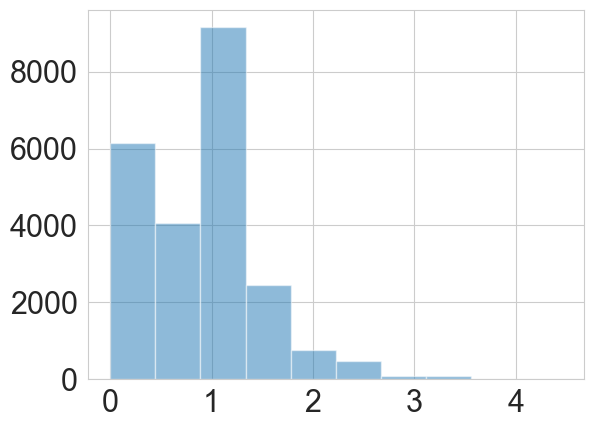

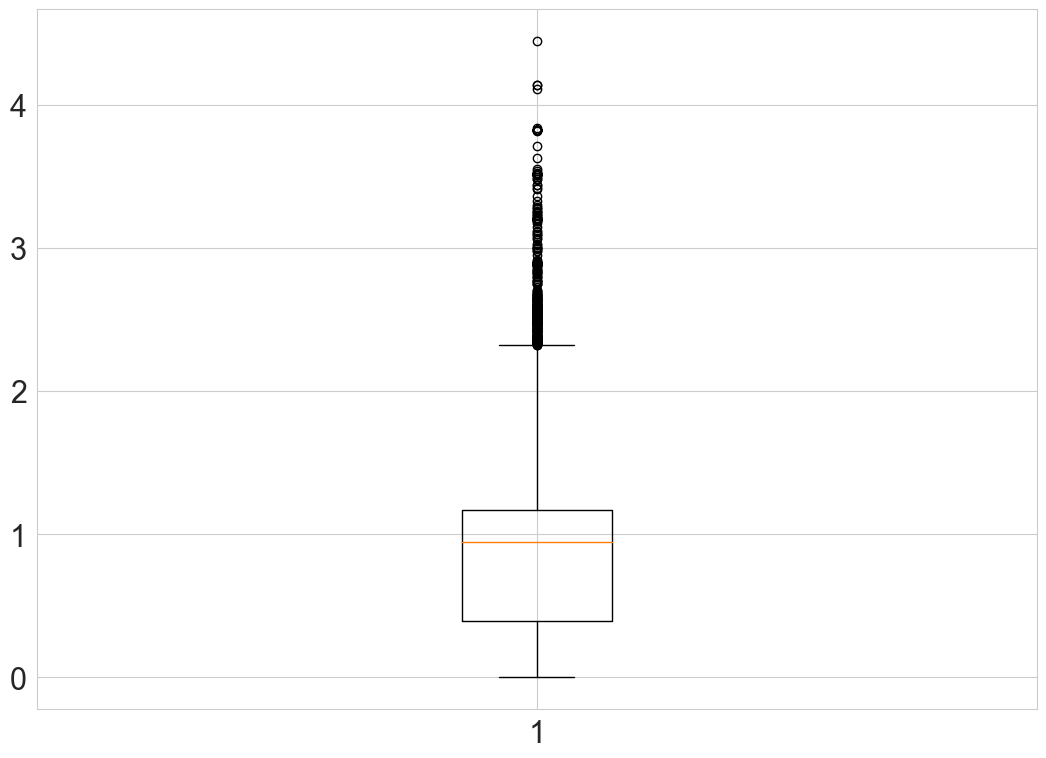

In [105]:
for d in range(depth_list.__len__()):
    plt.hist(pRFmodel[d].pRFsize[pRFmodel[d].r2>-1], alpha=0.5)
    # plt.show()
data = [pRFmodel[0].pRFsize[pRFmodel[0].r2>-1]]

fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data)

In [106]:
#atlas = 'benson'
#Select ROIs
#define fs_dir_path where Bensons' labels live:
if fssubject=='fsaverage':
    fs_dirPATH='/Volumes/May_fMRI/Inzicht_CFM/derivatives/freesurfer' #fsaverage where Bensons'labels have been projected beforehand using neuropythy
    subject=fssubject
else:
    fs_dirPATH=f'{MAIN_PATH}/freesurfer' #Bensons' labels need to be projected beforehand using neuropythy
    subject=subjectid
hemi=['RH','LH']

# idx_mov=np.delete(np.arange(nmov),np.concatenate((idx_con,idx_NR,idx_noise)))

idx_rois1, idx_vls1 = cortex.freesurfer.get_label(subject, label='benson14_eccen-0001',
                                        fs_dir=fs_dirPATH,
                                                  hemisphere=('lh', 'rh'),
                                                  verbose=True)

idx_rois4, idx_vls4 = cortex.freesurfer.get_label(subject, label='benson14_varea-0001',
    fs_dir=fs_dirPATH,
    hemisphere=('lh', 'rh'),
    verbose=True)

# roi_verts_LH = readVerts(roi, 'LH',subject, atlas, fs_dirPATH)
# roi_verts_RH = readVerts(roi, 'RH',subject, atlas, fs_dirPATH)
# idx_tokeep_LH=np.where(np.logical_and(idx_vls1[roi_verts_LH]<5, idx_vls1[roi_verts_LH]>-1))
# idx_tokeep_RH=np.where(np.logical_and(idx_vls1[roi_verts_RH]<5, idx_vls1[roi_verts_RH]>-1))

if atlas=='manual':
    idx_rois1, idx_vls1 = cortex.freesurfer.get_label(subject, label='benson14_eccen-0001',
                                            fs_dir=fs_dirPATH,
                                                      hemisphere=('lh', 'rh'),
                                                      verbose=True)

    idx_rois5, idx_vls5 = cortex.freesurfer.get_label(subject, label='manualdelin',
       fs_dir=fs_dirPATH,
      hemisphere=('lh','rh'),
      verbose=True)
    idx_vls4[idx_rois5]=idx_vls5

looking for ['/Users/mayra/Library/CloudStorage/OneDrive-UMCG/Postdoc/CFLamUp/derivatives/freesurfer/sub-001/label/lh.benson14_eccen-0001.label', '/Users/mayra/Library/CloudStorage/OneDrive-UMCG/Postdoc/CFLamUp/derivatives/freesurfer/sub-001/label/rh.benson14_eccen-0001.label']
looking for ['/Users/mayra/Library/CloudStorage/OneDrive-UMCG/Postdoc/CFLamUp/derivatives/freesurfer/sub-001/label/lh.benson14_varea-0001.label', '/Users/mayra/Library/CloudStorage/OneDrive-UMCG/Postdoc/CFLamUp/derivatives/freesurfer/sub-001/label/rh.benson14_varea-0001.label']


0.5133587742038245
0.445354467693966
0.39784272842098845
0.19392060401158623
0.37581489830871195
0.2934356931361507


/var/folders/6n/_hmh2wsx2r15_bn1jzlwpgw00000gn/T/ipykernel_83884/243845478.py:53: RuntimeWarning:

Mean of empty slice



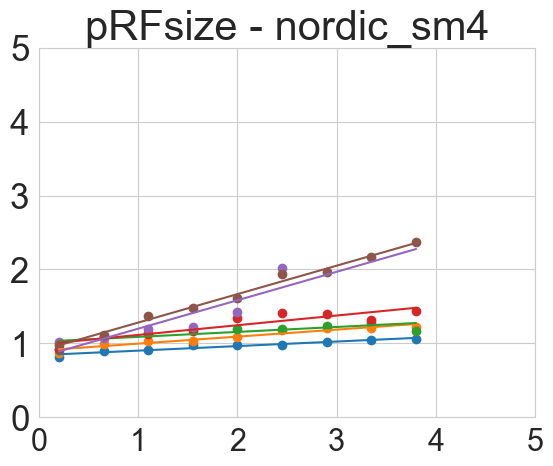

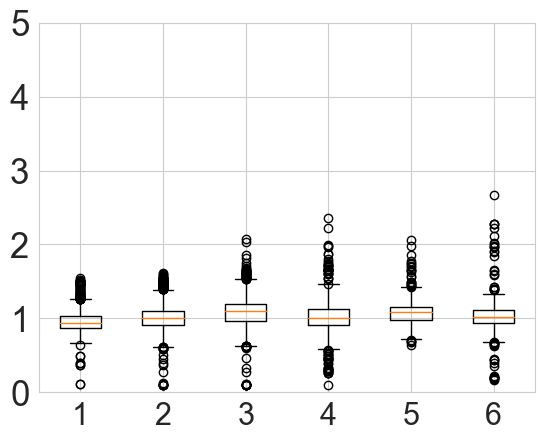

In [114]:
from numpy.polynomial import Polynomial

list_prop=["pRFcenter_ecc","pRFcenter_angle","pRFsize","r2"]
prop=list_prop[2]
rois_list = []
#rois_list = np.array([['V1', 'V2', 'V3', 'V3a', 'V3b', 'V4', 'LO1', 'LO2'], [1, 2, 3, 12, 11, 4, 7, 8]])
rois_list = np.array([['V1','V2', 'V3', 'V4', 'LO1', 'LO2'], [1, 2, 3, 4, 7, 8]])
rois = [['V1','V2', 'V3', 'V4', 'LO1', 'LO2']]

for r in range(rois[0].__len__()):
    for d in range(depth_list.__len__()):
        pRFmodel[d].pRFcenter_ecc = np.sqrt(prf_params[d][:,1]**2+prf_params[d][:,0]**2)
        pRFmodel[d].pRFcenter_angle = np.rad2deg(np.arctan2(prf_params[d][:,1],prf_params[d][:,0]))
        pRFmodel[d].pRFsize = prf_params[d][:,2]
        pRFmodel[d].r2 = prf_params[d][:,7]
    roi=rois[0][r]
    roi_idx = np.where(roi == rois_list[0, :])
    roi_verts = np.array(np.where(idx_vls4 == int(rois_list[1, roi_idx])))[0]
    idx=np.in1d(prf_params_vx[0],roi_verts)

    for d in range(depth_list.__len__()):
        pRFmodel[d].pRFcenter_ecc = pRFmodel[d].pRFcenter_ecc[idx==True]
        pRFmodel[d].pRFcenter_angle = pRFmodel[d].pRFcenter_angle[idx==True]
        pRFmodel[d].pRFsize = pRFmodel[d].pRFsize[idx==True]
        pRFmodel[d].r2 = pRFmodel[d].r2[idx==True]

    q1=np.percentile(pRFmodel[0].r2,25)
    q3=np.percentile(pRFmodel[0].r2,75)
    print(q3)
    thr=0.1
    idx_r2=pRFmodel[0].r2>thr
    idx_ecc1=pRFmodel[0].pRFcenter_ecc>0.2
    idx_ecc2=pRFmodel[0].pRFcenter_ecc<4
    idx_thr=np.where(np.logical_and(np.logical_and(idx_r2,idx_ecc1),idx_ecc2))
    if (r==0):
        data=[getattr(pRFmodel[0],prop)[idx_thr]]
    else:
        data.extend([getattr(pRFmodel[0],prop)[idx_thr]])

    ecc = [getattr(pRFmodel[0],"pRFcenter_ecc")[idx_thr]]
    getattr(pRFmodel[0],prop)[pRFmodel[0].r2>thr]
    # Creating plot
    plt.title(label=prop+" - "+denoising)
    plt.ylim([0,1])

    #plot prf-params vs. ecc - binned
    plt.figure(1)
    bins = np.linspace(0.2,3.8,9)
    inds = np.digitize(ecc, bins)
    #plt.scatter(bins[inds-1],data)
    mean=np.zeros(9)
    for i in range (9):
        mean[i]=np.nanmean(data[r][inds[0]==i+1])
    plt.scatter(np.linspace(0.2,3.8,9),mean)
    # Fit the trend line.
    idx = np.isfinite(mean)
    model= np.polyfit(np.linspace(0.2,3.8,9)[idx], mean[idx], deg=1)
    # Plot the trend line.
    predict = np.poly1d(model)
    x_line=range(0,6)
    x_line=np.linspace(0.2,3.8,9)
    #x_line=np.linspace(0.6,3.8,9)[idx]
    y_line=predict(x_line)
    plt.plot(x_line,y_line)
    plt.xlim([0,5])
    plt.ylim([0,5])

plt.show()
plt.boxplot(data)
if prop=='r2':
    plt.ylim([0,1])
else:
    plt.ylim([0,5])
plt.rc('font',size=25)

0.2836788905166644
0.1894957247468257
0.1518444634950728
0.06091400238109604
0.15789169092964053
0.12247502245536374


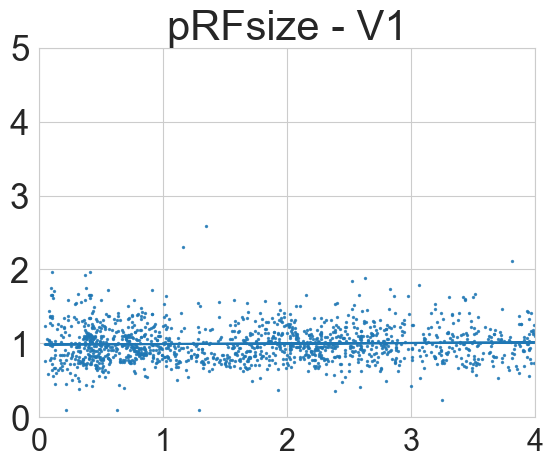

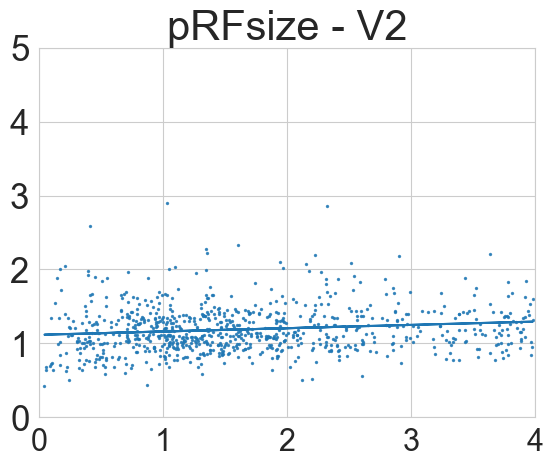

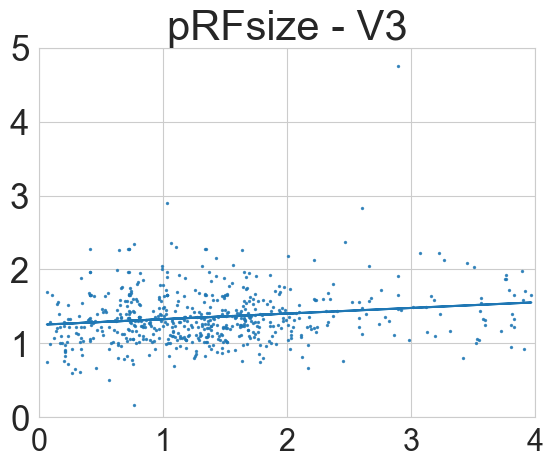

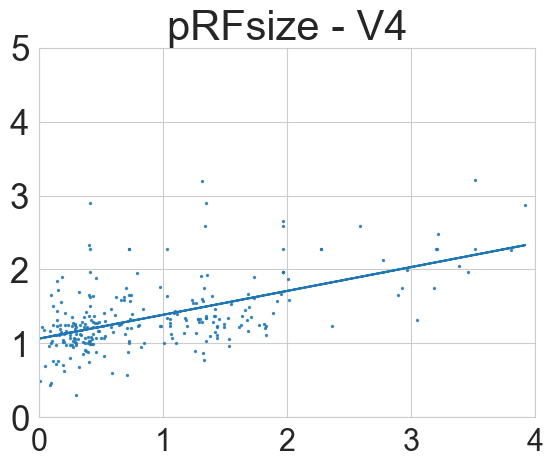

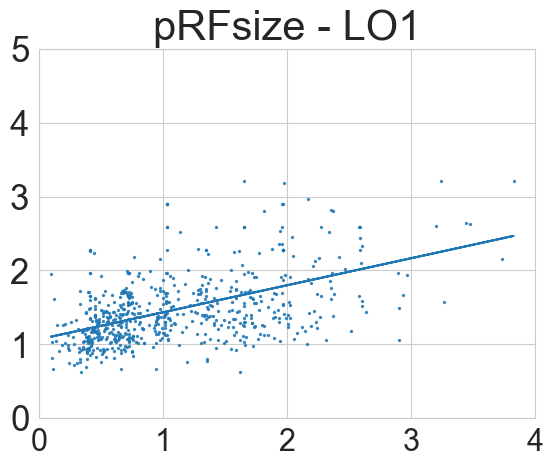

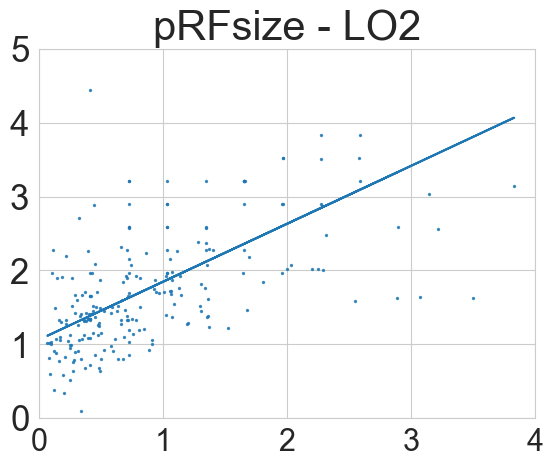

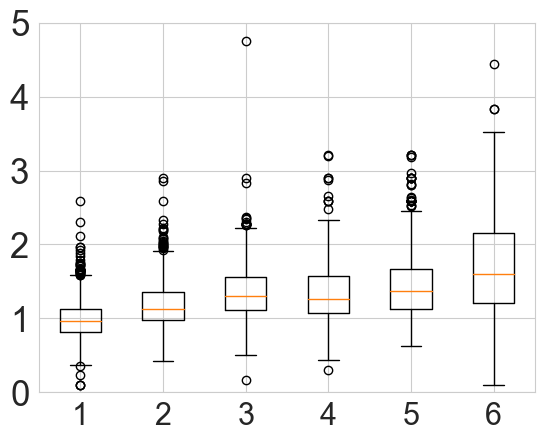

In [91]:
from numpy.polynomial import Polynomial

list_prop=["pRFcenter_ecc","pRFcenter_angle","pRFsize","r2"]
prop=list_prop[2]
rois_list = []
#rois_list = np.array([['V1', 'V2', 'V3', 'V3a', 'V3b', 'V4', 'LO1', 'LO2'], [1, 2, 3, 12, 11, 4, 7, 8]])
rois_list = np.array([['V1','V2', 'V3', 'V4', 'LO1', 'LO2'], [1, 2, 3, 4, 7, 8]])
rois = [['V1','V2', 'V3', 'V4', 'LO1', 'LO2']]

for r in range(rois[0].__len__()):
    for d in range(depth_list.__len__()):
        pRFmodel[d].pRFcenter_ecc = np.sqrt(prf_params[d][:,1]**2+prf_params[d][:,0]**2)
        pRFmodel[d].pRFcenter_angle = np.rad2deg(np.arctan2(prf_params[d][:,1],prf_params[d][:,0]))
        pRFmodel[d].pRFsize = prf_params[d][:,2]
        pRFmodel[d].r2 = prf_params[d][:,7]
    roi=rois[0][r]
    roi_idx = np.where(roi == rois_list[0, :])
    roi_verts = np.array(np.where(idx_vls4 == int(rois_list[1, roi_idx])))[0]
    idx=np.in1d(prf_params_vx[0],roi_verts)

    for d in range(depth_list.__len__()):
        pRFmodel[d].pRFcenter_ecc = pRFmodel[d].pRFcenter_ecc[idx==True]
        pRFmodel[d].pRFcenter_angle = pRFmodel[d].pRFcenter_angle[idx==True]
        pRFmodel[d].pRFsize = pRFmodel[d].pRFsize[idx==True]
        pRFmodel[d].r2 = pRFmodel[d].r2[idx==True]

    q1=np.percentile(pRFmodel[0].r2,25)
    q3=np.percentile(pRFmodel[0].r2,75)
    print(q3)
    thr=0.1
    idx_r2=pRFmodel[0].r2>thr
    idx_ecc1=pRFmodel[0].pRFcenter_ecc>0
    idx_ecc2=pRFmodel[0].pRFcenter_ecc<4
    idx_thr=np.where(np.logical_and(np.logical_and(idx_r2,idx_ecc1),idx_ecc2))
    if (r==0):
        data=[getattr(pRFmodel[0],prop)[idx_thr]]
    else:
        data.extend([getattr(pRFmodel[0],prop)[idx_thr]])

    ecc = [getattr(pRFmodel[0],"pRFcenter_ecc")[idx_thr]]
    getattr(pRFmodel[0],prop)[pRFmodel[0].r2>thr]
    # Creating plot


    #plot prf-params vs. ecc - binned
    plt.figure(r)
    plt.title(label=prop+" - "+rois_list[0][r])
    plt.xlim([0,4])
    if prop=='r2':
        plt.ylim([0,1])
    else:
        plt.ylim([0,5])
    plt.rc('font',size=25)
    # bins = np.linspace(0.4,4,10)
    # inds = np.digitize(ecc, bins)
    # #plt.scatter(bins[inds-1],data)
    # mean=np.zeros(9)
    # for i in range (9):
    #     mean[i]=np.nanmean(data[r][inds[0]==i+1])
    plt.scatter(ecc,data[r], alpha=0.8, s=2)
    # Fit the trend line.
    # idx = np.isfinite(mean)
    model= np.polyfit(ecc[0][:],data[r], deg=1)
    # Plot the trend line.
    predict = np.poly1d(model)
    #x_line=range(0,5)
    x_line=ecc[0][:]
    y_line=predict(x_line)
    plt.plot(x_line,y_line)

plt.show()
plt.boxplot(data)
if prop=='r2':
    plt.ylim([0,1])
else:
    plt.ylim([0,5])
plt.rc('font',size=25)

In [95]:
roi=rois[0][r]
roi
data[0]

array([1.20687534, 0.95033797, 0.98971838, ..., 0.8366616 , 0.95795425,
       0.78874543])

In [96]:
best_vx=np.where(prf_params[0][:,-1]==prf_params[0][:,-1].max())
print(best_vx)
print(prf_params[0][:,-1].max())

(array([11184]),)
0.7990437764686332


In [97]:
print(prf_params_vx[0][best_vx]-numel_left)#144493)
prf_params_vx[0][best_vx]

[123710]


array([268203])

(292004, 240)
(292004, 225)
(12098, 225)
(292004, 240)
(292004, 225)
(12098, 225)


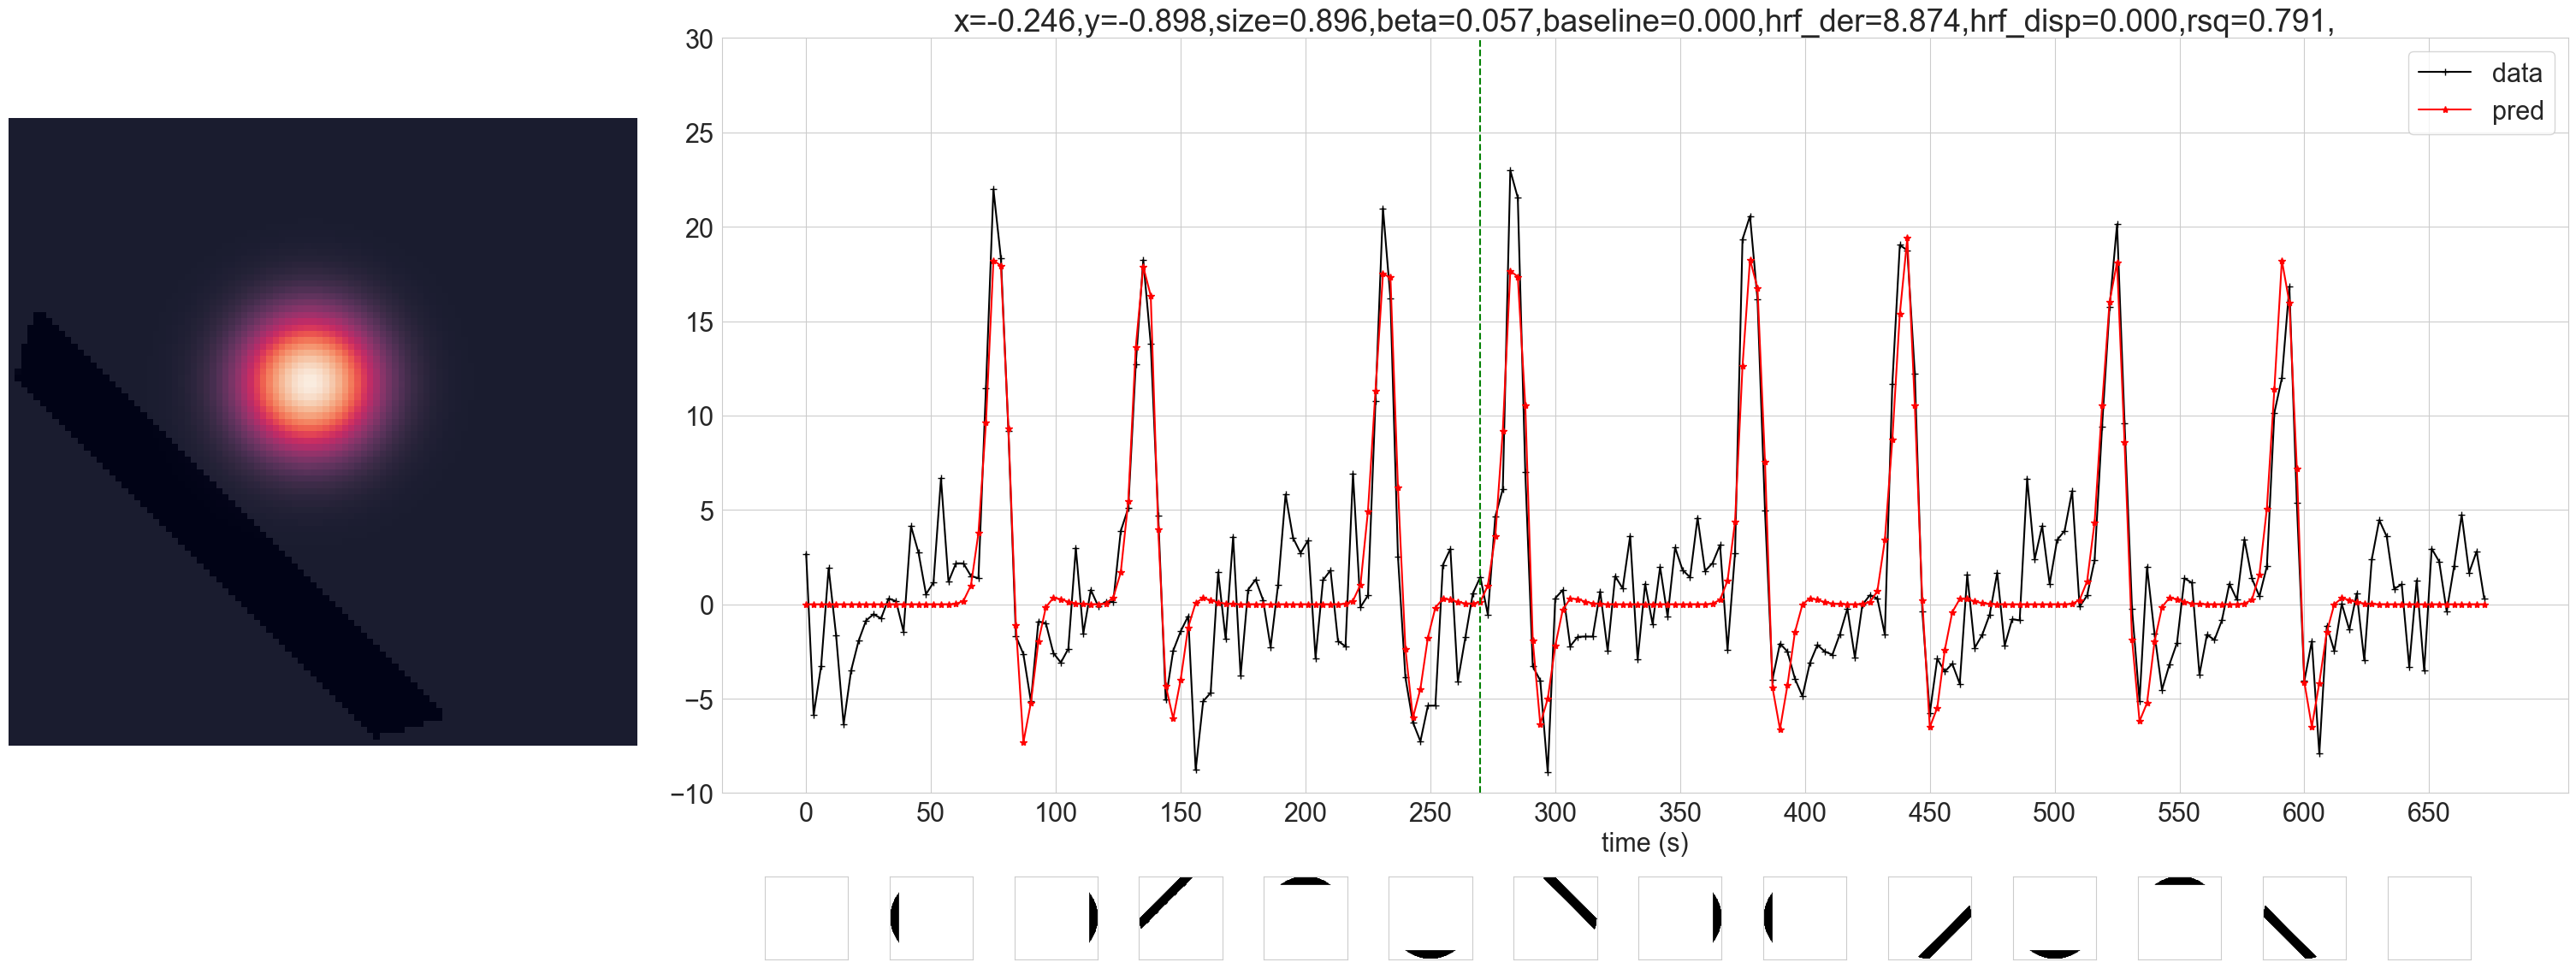

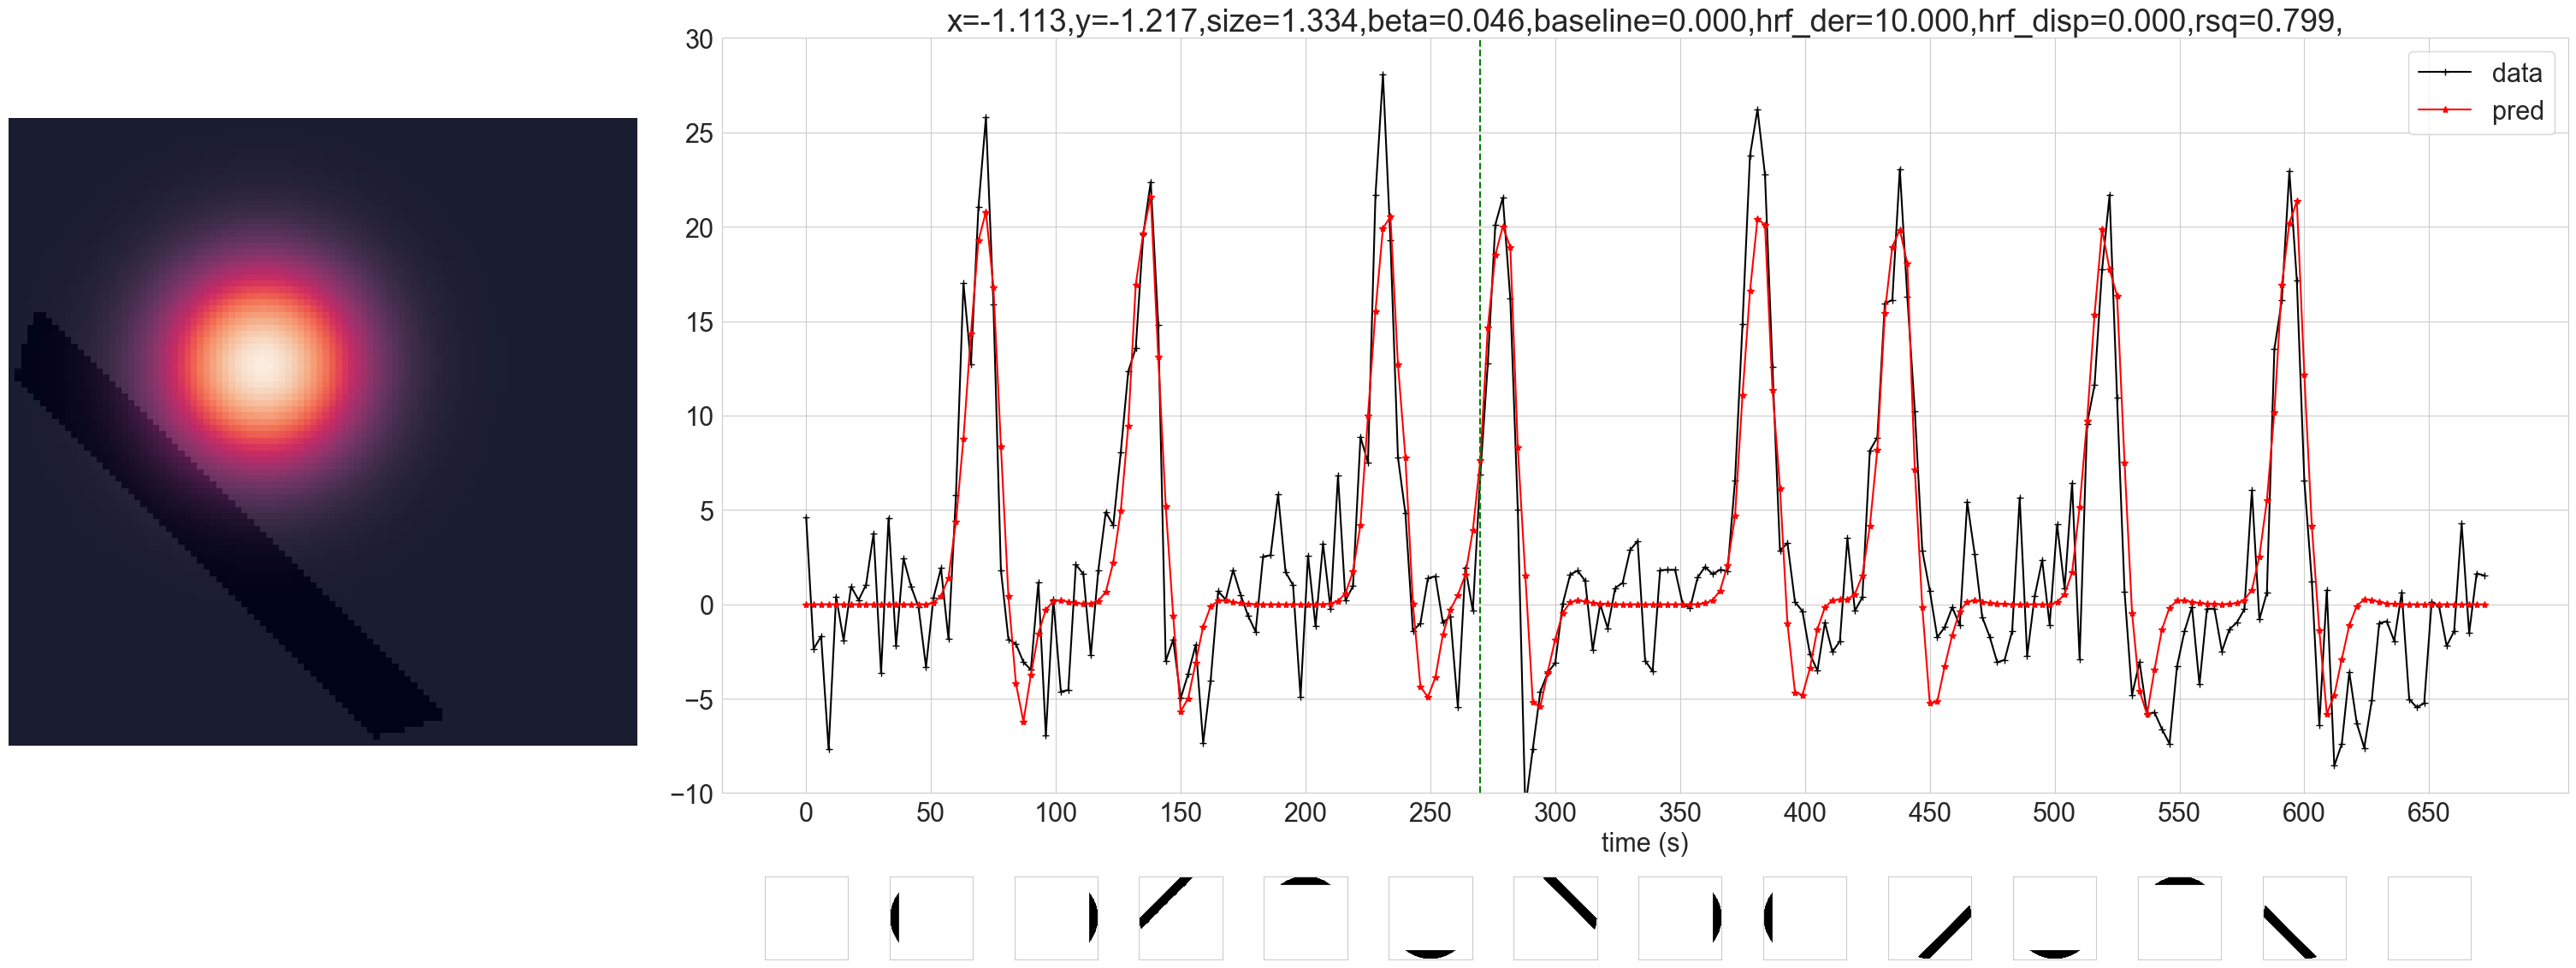

In [99]:
from prfpy.rf import gauss2D_iso_cart
from marcus_prf_eg.plot_functions import *
from prfpy.stimulus import PRFStimulus2D
import scipy.io

rsq_idx = prf_params[0][:,-1] >0.79
rsq_idx = np.where(rsq_idx)[0][0:10]
for i_vx in rsq_idx:
    TR_s = pkl_data['settings']['TR']
    fig = plt.figure(constrained_layout=True, figsize=(30,10))
    subfigs = fig.subfigures(1, 2, width_ratios=[10,30])
    #i_vx = 0
    #i_vx=11184

    #load dm
    dm =scipy.io.loadmat(f'{MAIN_PATH}/pRFM/sub-001/ses-1/design_task-ret.mat')['stim']
    #load psc
    psc_avg_ts_full=np.load(f'{MAIN_PATH}/pRFM/{subject}/ses-1/{denoising}/{subject}_ses-1_task-ret_hemi-LR_desc-avg_bold_{depth}.npy').T[:,:]
    print(psc_avg_ts_full.shape)

    if psc_avg_ts_full.shape[1]>225:
        psc_avg_ts_full=psc_avg_ts_full[:,:225]

    print(psc_avg_ts_full.shape)
    psc_avg_ts=psc_avg_ts_full[pkl_data['rois_mask']==1]
    print(psc_avg_ts.shape)

    #load prf_stim
    prf_stim = PRFStimulus2D(
        screen_size_cm=pkl_data['settings']['screen_size_cm'],          # Distance of screen to eye
        screen_distance_cm=pkl_data['settings']['screen_distance_cm'],  # height of the screen (i.e., the diameter of the stimulated region)
        design_matrix=dm,                                   # dm (npix x npix x time_points)
        TR=pkl_data['settings']['TR'],                                  # TR
        )

    # ************* TIME COURSE PLOT *************
    time_pts = np.arange(psc_avg_ts.shape[1]) * TR_s
    ax2 = subfigs[1].add_subplot()
    ax2.plot(time_pts, psc_avg_ts[i_vx,:], '-+k', label= 'data')
    ax2.plot(time_pts, pkl_data['pred_tc'][i_vx,:], '-*r', label= 'pred')
    # ax2.plot(time_pts, pred_tc_nohrf[i_vx,:], '-*b', label= 'pred_nohrf')
    ax2.set_xlabel('time (s)')
    ax2.legend()
    ax2.set_ylim([-10,30])
    plt.rcParams.update({'font.size': 22})

    gauss_param_name = ['x', 'y', 'size', 'beta', 'baseline', 'hrf_der','hrf_disp','rsq']
    title_txt = ''
    for i,p in enumerate(gauss_param_name):
        title_txt += f'{p}={prf_params[0][i_vx,i]:.3f},'
    ax2.set_title(title_txt)

    # ********* PRF PLOT **********
    rf = gauss2D_iso_cart(
        x=prf_stim.x_coordinates,
        y=prf_stim.y_coordinates,
        mu=(prf_params[0][i_vx,0], prf_params[0][i_vx,1]),
        sigma=prf_params[0][i_vx,2])
    ax1 = subfigs[0].add_subplot()
    ax1.imshow(rf, vmin=0, vmax=1, extent=[-5,5,-5,5])
    ax1.axis('off')

    time_pt = 90
    if time_pt != None:
        ax1.imshow(dm[:,:,time_pt], vmin=0, vmax=1,cmap='Greys', alpha=0.1, extent=[-5,5,-5,5])
        ax_lim = ax2.get_ylim()
        ax2.plot((time_pt*TR_s, time_pt*TR_s), (ax_lim), '--g')

    ax2.set_xticks(np.arange(time_pts[0], time_pts[-1],50))
    plt.rc('axes', labelsize=22)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=22)
    add_dm_to_ts(fig, ax2, dm, TR=TR_s, dx_axs=2)
